Note: This is the start of modeling with recall as the new scoring metric as oposed to accuracy. 

## Imports

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

#Scikit learn imports:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors, metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
from src.dataprep import prep_df
df = prep_df()
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,-1.277445,-1.160323,-0.994194
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,0.066327,-0.259629,-0.173740
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,-1.236724,-0.362660,-0.959649
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,0.514251,-0.746535,-0.195248
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,-1.236724,0.197365,-0.940457


In [3]:
X = df.drop(['Churn'], axis = 1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 7)
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, test_size = .2, random_state = 7)

My process here is going to be similar to how I aproached optimizing accuracy, so I will likely have less text in between models.

### KNN

I'm going to start with n_neigbors and then mess with p

#### Default: n_neighbors = 5, p = 2

In [15]:
knn = neighbors.KNeighborsClassifier()
knn.fit(X_t, y_t)
train_pred = knn.predict(X_t)
print("Train:")
print(recall_score(train_pred, y_t))
val_pred = knn.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.7205452775073028
Val:
0.5021097046413502


In [7]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 2, p = 2)
knn.fit(X_t, y_t)
train_pred = knn.predict(X_t)
print("Train:")
print(recall_score(train_pred, y_t))
val_pred = knn.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
1.0
Val:
0.5426356589147286


In [10]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 3, p = 2)
knn.fit(X_t, y_t)
train_pred = knn.predict(X_t)
print("Train:")
print(recall_score(train_pred, y_t))
val_pred = knn.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.7670349907918969
Val:
0.4901185770750988


In [22]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 7, p = 2)
knn.fit(X_t, y_t)
train_pred = knn.predict(X_t)
print("Train:")
print(recall_score(train_pred, y_t))
val_pred = knn.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.6829025844930418
Val:
0.5062240663900415


In [23]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 10, p = 2)
knn.fit(X_t, y_t)
train_pred = knn.predict(X_t)
print("Train:")
print(recall_score(train_pred, y_t))
val_pred = knn.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.6991576413959085
Val:
0.5692307692307692


In [24]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 12, p = 2)
knn.fit(X_t, y_t)
train_pred = knn.predict(X_t)
print("Train:")
print(recall_score(train_pred, y_t))
val_pred = knn.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.6855491329479769
Val:
0.5771144278606966


In [25]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 13, p = 2)
knn.fit(X_t, y_t)
train_pred = knn.predict(X_t)
print("Train:")
print(recall_score(train_pred, y_t))
val_pred = knn.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.6614634146341464
Val:
0.5606694560669456


In [26]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 11, p = 2)
knn.fit(X_t, y_t)
train_pred = knn.predict(X_t)
print("Train:")
print(recall_score(train_pred, y_t))
val_pred = knn.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.6696252465483234
Val:
0.5390946502057613


n_neighbors = 12 seems to be working best, but man those scores are not good

In [28]:
knn = neighbors.KNeighborsClassifier(p = 1)
knn.fit(X_t, y_t)
train_pred = knn.predict(X_t)
print("Train:")
print(recall_score(train_pred, y_t))
val_pred = knn.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.7216589861751153
Val:
0.5258964143426295


In [30]:
knn = neighbors.KNeighborsClassifier(p = 3)
knn.fit(X_t, y_t)
train_pred = knn.predict(X_t)
print("Train:")
print(recall_score(train_pred, y_t))
val_pred = knn.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.7182266009852217
Val:
0.5240174672489083


p = 1 seems to work a little better

In [72]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 12, p = 1)
knn.fit(X_t, y_t)
train_pred = knn.predict(X_t)
print("Train:")
print(recall_score(train_pred, y_t))
val_pred = knn.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.6998939554612937
Val:
0.5871559633027523


[[752  90]
 [155 128]]


<AxesSubplot:>

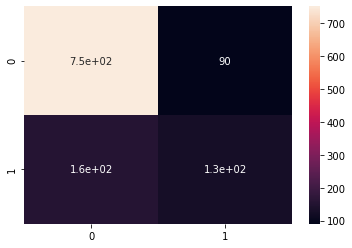

In [73]:
y_hat = knn.predict(X_val)
cf_mat = confusion_matrix(y_val, y_hat)
print(cf_mat)
sns.heatmap(cf_mat, annot=True)

Note: 1 is churned and 0 is not churned

(array([907.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 218.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

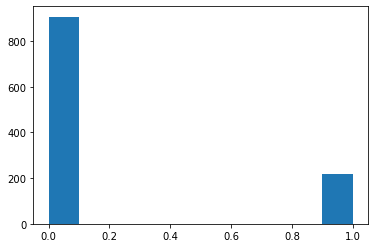

In [76]:
plt.hist(y_hat)

(array([842.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 283.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

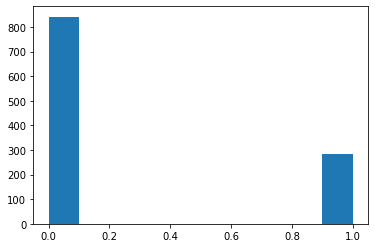

In [78]:
plt.hist(y_val)

Looks like the model is better at IDing not churned customers than churned ones.

### Random Forest

The main difference here is that I'll start with the my actual default's and now start with 10 as my default value for n_estimators, other than that this will be virtualy the same process as before. 

In [43]:
rf = RandomForestClassifier(n_estimators=10, max_depth=None, max_features='auto', random_state = 7)

rf.fit(X_t, y_t)
train_pred = rf.predict(X_t)
print("Train:")
print(recall_score(train_pred, y_t))
val_pred = rf.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.98861646234676
Val:
0.62


Better than the KNN already, but still not great

In [44]:
rf = RandomForestClassifier(n_estimators=100, max_depth=None, max_features='auto', random_state = 7)

rf.fit(X_t, y_t)
train_pred = rf.predict(X_t)
print("Train:")
print(recall_score(train_pred, y_t))
val_pred = rf.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.995819397993311
Val:
0.5913461538461539


In [45]:
rf = RandomForestClassifier(n_estimators=20, max_depth=None, max_features='auto', random_state = 7)

rf.fit(X_t, y_t)
train_pred = rf.predict(X_t)
print("Train:")
print(recall_score(train_pred, y_t))
val_pred = rf.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.9915397631133672
Val:
0.6135265700483091


In [46]:
rf = RandomForestClassifier(n_estimators=30, max_depth=None, max_features='auto', random_state = 7)

rf.fit(X_t, y_t)
train_pred = rf.predict(X_t)
print("Train:")
print(recall_score(train_pred, y_t))
val_pred = rf.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.9924874791318865
Val:
0.6213592233009708


In [50]:
rf = RandomForestClassifier(n_estimators=35, max_depth=None, max_features='auto', random_state = 7)

rf.fit(X_t, y_t)
train_pred = rf.predict(X_t)
print("Train:")
print(recall_score(train_pred, y_t))
val_pred = rf.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.9933277731442869
Val:
0.6093023255813953


In [51]:
rf = RandomForestClassifier(n_estimators=31, max_depth=None, max_features='auto', random_state = 7)

rf.fit(X_t, y_t)
train_pred = rf.predict(X_t)
print("Train:")
print(recall_score(train_pred, y_t))
val_pred = rf.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.9925
Val:
0.6082949308755761


In [52]:
rf = RandomForestClassifier(n_estimators=29, max_depth=None, max_features='auto', random_state = 7)

rf.fit(X_t, y_t)
train_pred = rf.predict(X_t)
print("Train:")
print(recall_score(train_pred, y_t))
val_pred = rf.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.9916736053288926
Val:
0.6064814814814815


Looks like n = 30 is working best, but they're all super overfit

In [53]:
rf = RandomForestClassifier(n_estimators=30, max_depth=5, max_features='auto', random_state = 7)

rf.fit(X_t, y_t)
train_pred = rf.predict(X_t)
print("Train:")
print(recall_score(train_pred, y_t))
val_pred = rf.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.6991869918699187
Val:
0.67


In [54]:
rf = RandomForestClassifier(n_estimators=30, max_depth=10, max_features='auto', random_state = 7)

rf.fit(X_t, y_t)
train_pred = rf.predict(X_t)
print("Train:")
print(recall_score(train_pred, y_t))
val_pred = rf.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.8683693516699411
Val:
0.6179245283018868


In [55]:
rf = RandomForestClassifier(n_estimators=30, max_depth=7, max_features='auto', random_state = 7)

rf.fit(X_t, y_t)
train_pred = rf.predict(X_t)
print("Train:")
print(recall_score(train_pred, y_t))
val_pred = rf.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.7477973568281938
Val:
0.6338028169014085


In [56]:
rf = RandomForestClassifier(n_estimators=30, max_depth=3, max_features='auto', random_state = 7)

rf.fit(X_t, y_t)
train_pred = rf.predict(X_t)
print("Train:")
print(recall_score(train_pred, y_t))
val_pred = rf.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.7261698440207972
Val:
0.7478991596638656


In [57]:
rf = RandomForestClassifier(n_estimators=30, max_depth=2, max_features='auto', random_state = 7)

rf.fit(X_t, y_t)
train_pred = rf.predict(X_t)
print("Train:")
print(recall_score(train_pred, y_t))
val_pred = rf.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.7638036809815951
Val:
0.8026315789473685


max_depth=2 is working very well, makes me suspicious that I'm doing something incorrectly, but I'll keep going. 

In [59]:
rf = RandomForestClassifier(n_estimators=30, max_depth=2, max_features=10, random_state = 7)

rf.fit(X_t, y_t)
train_pred = rf.predict(X_t)
print("Train:")
print(recall_score(train_pred, y_t))
val_pred = rf.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.7377049180327869
Val:
0.6981132075471698


In [60]:
rf = RandomForestClassifier(n_estimators=30, max_depth=2, max_features=5, random_state = 7)

rf.fit(X_t, y_t)
train_pred = rf.predict(X_t)
print("Train:")
print(recall_score(train_pred, y_t))
val_pred = rf.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.727710843373494
Val:
0.7653061224489796


In [65]:
rf = RandomForestClassifier(n_estimators=30, max_depth=2, max_features=2, random_state = 7)

rf.fit(X_t, y_t)
train_pred = rf.predict(X_t)
print("Train:")
print(recall_score(train_pred, y_t))
val_pred = rf.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.7748344370860927
Val:
0.8333333333333334


In [79]:
rf = RandomForestClassifier(n_estimators=30, max_depth=2, max_features=3, random_state = 7)

rf.fit(X_t, y_t)
train_pred = rf.predict(X_t)
print("Train:")
print(recall_score(train_pred, y_t))
val_pred = rf.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.8324873096446701
Val:
0.825


Although the validation accuracy did perform better with max_features = 2, the difference in train vs val accuracy  makes me want to stick with 3.

[[835   7]
 [250  33]]


<AxesSubplot:>

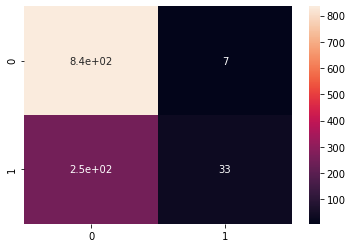

In [80]:
y_hat = rf.predict(X_val)
cf_mat = confusion_matrix(y_val, y_hat)
print(cf_mat)
sns.heatmap(cf_mat, annot=True)

(array([1085.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          40.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

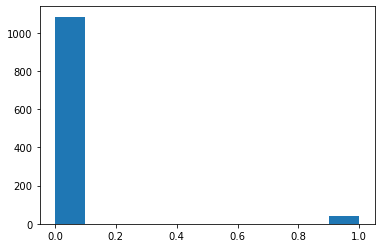

In [83]:
plt.hist(y_hat)

(array([842.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 283.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

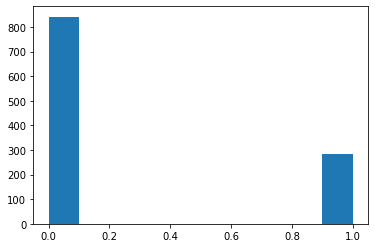

In [82]:
plt.hist(y_val)

The model is clearly favoring not churned customers to churned ones, the next notebook will be dedicated to using SMOTE and then running the rf and knn models again. The imbalance is too great to train a good model.